### Problem Statement
Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher interests on existing debts as well as any new obligations. From an investor's point of view, he would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.

A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.

Data that is available includes information from the financial statement of the companies for the previous year (2015). Also, information about the Networth of the company in the following year (2016) is provided which can be used to drive the labeled field.

In [29]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.style
from warnings import filterwarnings
filterwarnings("ignore")

#### Loading the data

In [30]:
df = pd.read_excel('Company_Data2015-1.xlsx')

### Exploratory Data Analysis

In [31]:
df.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [32]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-','_').str.replace('%','perc').str.replace('[','_').str.replace(']','').str.replace('/','_to_')

In [33]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_to_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Production', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT',
       'PAT', 'Adjusted_PAT', 'CP', 'Revenue_earnings_in_forex',
       'Revenue_expenses_in_forex', 'Capital_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj._Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
     

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_to_Liabilities   

In [35]:
# drop the columns that are useless for the model
df.drop('Co_Code', axis=1, inplace=True)
df.drop('Co_Name', axis=1, inplace=True)

In [36]:
df.describe()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_to_Liabilities,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_to_Total_Assets,Value_of_Output_to_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,1778.453751,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,11437.574690,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,-4.510000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,10.555000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,52.010000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,310.540000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,254737.220000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [37]:
df.shape

(3586, 65)

In [38]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [39]:
# Are there any missing values ?
df.isnull().sum().sort_values(ascending=False).head(15)

Inventory_Velocity_Days              103
Book_Value_Adj._Unit_Curr              4
Current_Ratio_Latest                   1
PBITM_perc_Latest                      1
Fixed_Assets_Ratio_Latest              1
Inventory_Ratio_Latest                 1
Debtors_Ratio_Latest                   1
Total_Asset_Turnover_Ratio_Latest      1
PBIDTM_perc_Latest                     1
Interest_Cover_Ratio_Latest            1
PBDTM_perc_Latest                      1
CPM_perc_Latest                        1
APATM_perc_Latest                      1
ROG_PBT_perc                           0
ROG_Net_Sales_perc                     0
dtype: int64

### 1.1 Outlier Treatment

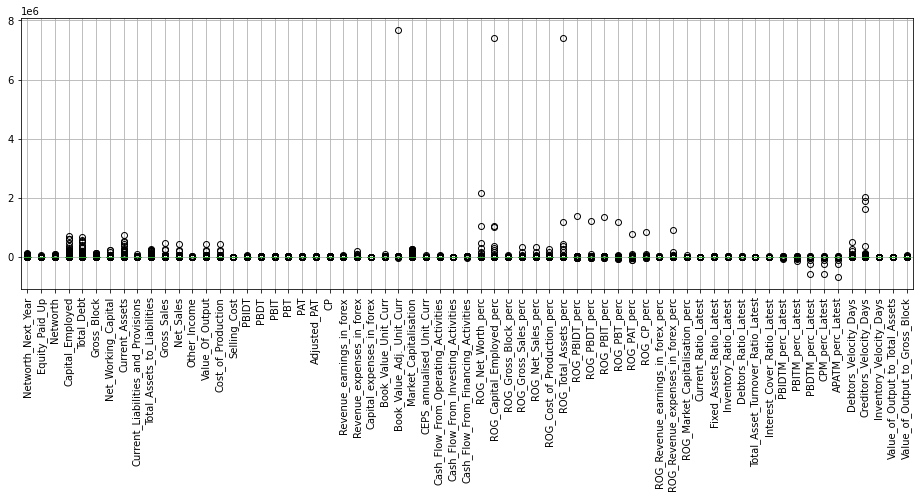

In [40]:
# Checking Outliers in dataset
df.boxplot(figsize=(16,5))
plt.xticks(rotation=90)
plt.show()

In [43]:
df_X = df.drop('Default', axis = 1)
df_Y = df['Default']

In [44]:
def mod_outlier(df_X):
    df1 = df_X.copy()
    df_X = df_X._get_numeric_data()
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    iqr = q3 - q1
    
    lower_bound = q1 -(1.5 * iqr)
    upper_bound = q3 +(1.5 * iqr)
    
    for col in df_X.columns:
        for i in range(0,len(df[col])):
            if df_X[col][i] < lower_bound[col]:
                df_X[col][i] = lower_bound[col]
            if df_X[col][i] > upper_bound[col]:
                df_X[col][i] = upper_bound[col]
    for col in df_X.columns:
        df1[col] = df_X[col]
    return(df1)

In [45]:
df_X = mod_outlier(df_X)

In [46]:
df = pd.concat([df_X, df_Y], axis = 1)

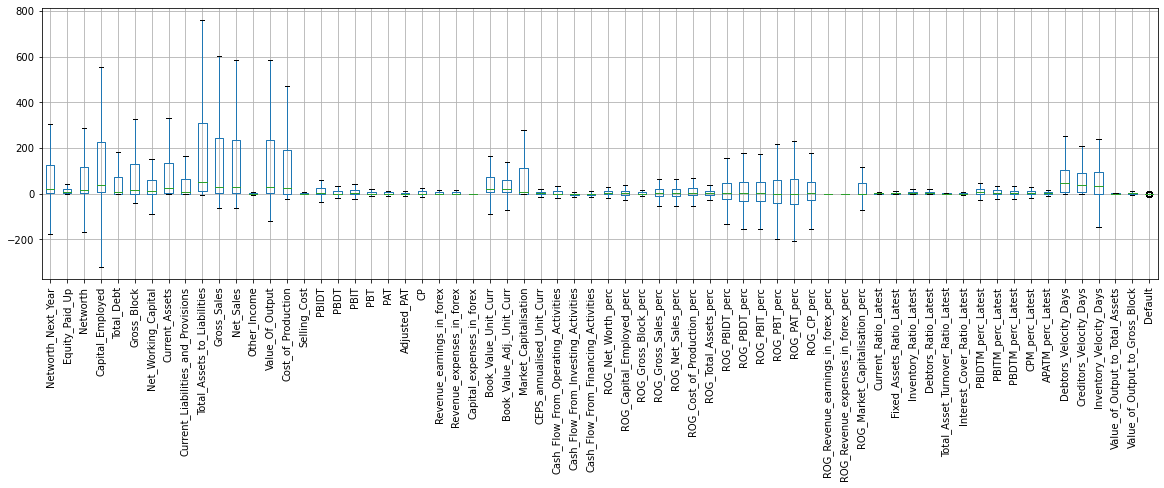

In [47]:
# Checking Outliers in dataset
df.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.show()

### 1.2 Missing Value Treatment

In [48]:
df['Inventory_Velocity_Days']=df['Inventory_Velocity_Days'].fillna(df['Inventory_Velocity_Days'].median())

In [49]:
df = df.dropna(subset=['Book_Value_Adj._Unit_Curr',
                       'Current_Ratio_Latest',          
                       'PBITM_perc_Latest',                      
                       'Fixed_Assets_Ratio_Latest',              
                       'Inventory_Ratio_Latest',                 
                       'Debtors_Ratio_Latest',                   
                       'Total_Asset_Turnover_Ratio_Latest',      
                       'PBIDTM_perc_Latest',                     
                       'Interest_Cover_Ratio_Latest',            
                       'PBDTM_perc_Latest',                      
                       'CPM_perc_Latest',                        
                       'APATM_perc_Latest'])

In [50]:
# Are there any missing values ?
df.isnull().sum()

Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
                                  ..
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_to_Total_Assets    0
Value_of_Output_to_Gross_Block     0
Default                            0
Length: 66, dtype: int64

In [51]:
df.shape

(3581, 66)

### 1.3 Transform Target variable into 0 and 1

In [41]:
df['Default']=np.where(df['Networth_Next_Year']<0,1,0)

In [42]:
df['Default'].value_counts()

0    3199
1     387
Name: Default, dtype: int64

### 1.4 Univariate (4 marks) & Bivariate ( 6marks) analysis with proper interpretation. (You may choose to include only those variables which were significant in the model building)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif = [variance_inflation_factor(df.values, ix) for ix in range(df.shape[1])]

In [54]:
i=0
for column in df.columns:
    if i < 66:
        print (column ,"--->",  vif[i], vif[i]<5)
        i = i+1

Networth_Next_Year ---> 23.84521751822819 False
Equity_Paid_Up ---> 4.724323872239721 True
Networth ---> 28.71936370626811 False
Capital_Employed ---> 73.3478426358128 False
Total_Debt ---> 7.374721097888228 False
Gross_Block ---> 12.496356135633995 False
Net_Working_Capital ---> 5.344757268100453 False
Current_Assets ---> 33.33151045702297 False
Current_Liabilities_and_Provisions ---> 23.477466791315788 False
Total_Assets_to_Liabilities ---> 105.74333674673228 False
Gross_Sales ---> 978.5323984103597 False
Net_Sales ---> 1711.5552187308663 False
Other_Income ---> 4.547904873044726 True
Value_Of_Output ---> 694.1415121290219 False
Cost_of_Production ---> 51.01841944895733 False
Selling_Cost ---> 4.6174947005407265 True
PBIDT ---> 32.659167647383576 False
PBDT ---> 117.91181149371843 False
PBIT ---> 29.41486583721684 False
PBT ---> 75.62084539531777 False
PAT ---> 76.82892829411672 False
Adjusted_PAT ---> 17.33796148350317 False
CP ---> 104.6649780580138 False
Revenue_earnings_in_forex 

In [55]:
df_new = pd.DataFrame(data=df, columns= ['Equity_Paid_Up',
                       'Other_Income',
                       'Selling_Cost',
                       'Revenue_earnings_in_forex',
                       'Revenue_expenses_in_forex',
                       'Market_Capitalisation',
                       'Cash_Flow_From_Operating_Activities',
                       'Cash_Flow_From_Investing_Activities',
                       'Cash_Flow_From_Financing_Activities',
                       'ROG_Net_Worth_perc',
                       'ROG_Capital_Employed_perc',
                       'ROG_Gross_Block_perc',
                       'ROG_Cost_of_Production_perc',
                       'ROG_Total_Assets_perc',
                       'ROG_Market_Capitalisation_perc',
                       'Current_Ratio_Latest',
                       'Inventory_Ratio_Latest',
                       'Debtors_Ratio_Latest',
                       'Interest_Cover_Ratio_Latest',
                       'Debtors_Velocity_Days',
                       'Creditors_Velocity_Days',
                       'Inventory_Velocity_Days',
                       'Default'])

In [56]:
df_new.columns

Index(['Equity_Paid_Up', 'Other_Income', 'Selling_Cost',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Market_Capitalisation', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days', 'Default'],
      dtype='object')

#### Univariate analysis of important features

<AxesSubplot:xlabel='Market_Capitalisation'>

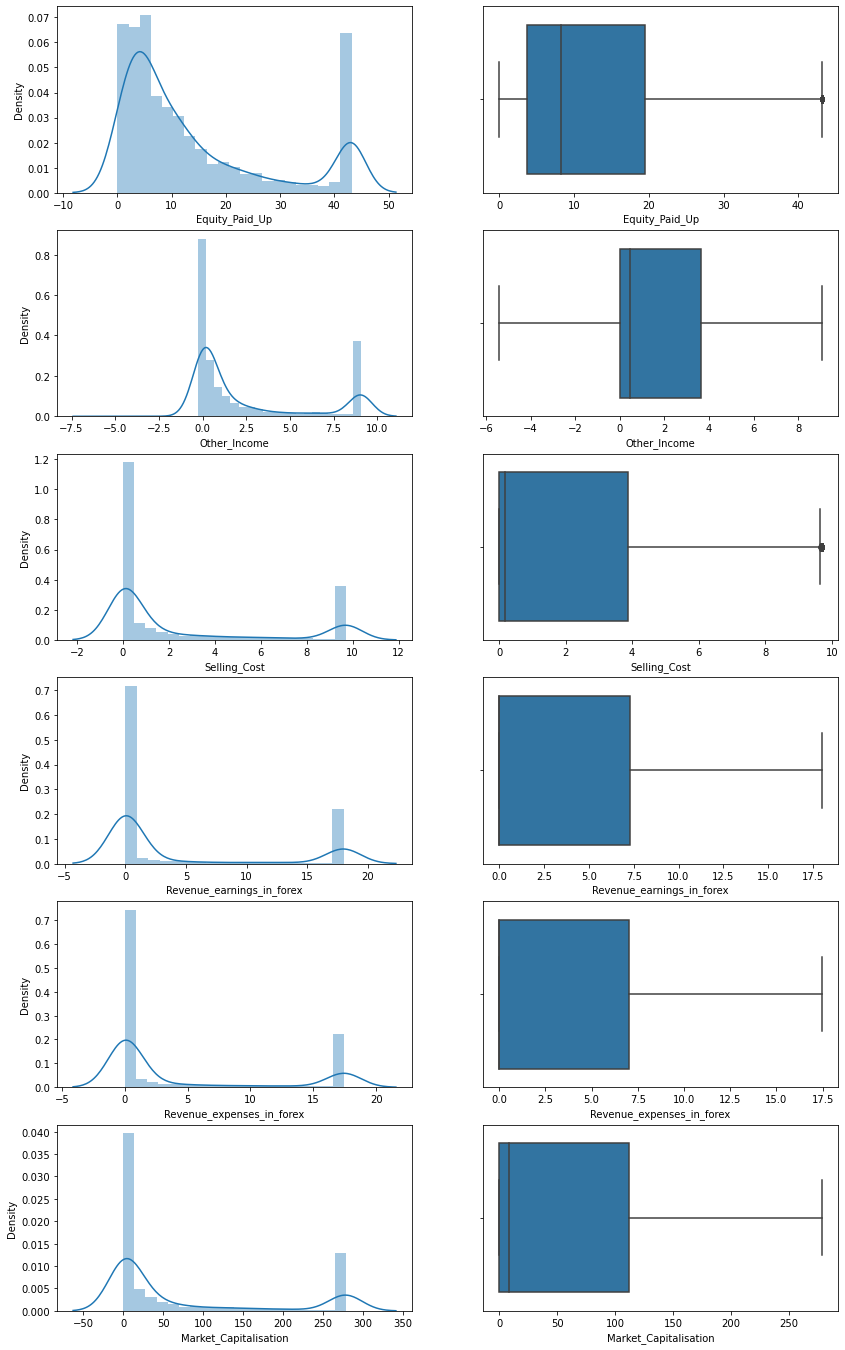

In [57]:
fig,axes = plt.subplots(nrows= 6, ncols=2)
fig.set_size_inches(14,24)

sns.distplot(df['Equity_Paid_Up'], ax= axes[0][0])
sns.boxplot(df['Equity_Paid_Up'],orient = 'H', ax= axes[0][1])

sns.distplot(df['Other_Income'], ax= axes[1][0])
sns.boxplot(df['Other_Income'],orient = 'H', ax= axes[1][1])

sns.distplot(df['Selling_Cost'], ax= axes[2][0])
sns.boxplot(df['Selling_Cost'],orient = 'H', ax= axes[2][1])

sns.distplot(df['Revenue_earnings_in_forex'], ax= axes[3][0])
sns.boxplot(df['Revenue_earnings_in_forex'],orient = 'H', ax= axes[3][1])

sns.distplot(df['Revenue_expenses_in_forex'], ax= axes[4][0])
sns.boxplot(df['Revenue_expenses_in_forex'],orient = 'H', ax= axes[4][1])

sns.distplot(df['Market_Capitalisation'], ax= axes[5][0])
sns.boxplot(df['Market_Capitalisation'],orient = 'H', ax= axes[5][1])

<AxesSubplot:xlabel='ROG_Cost_of_Production_perc'>

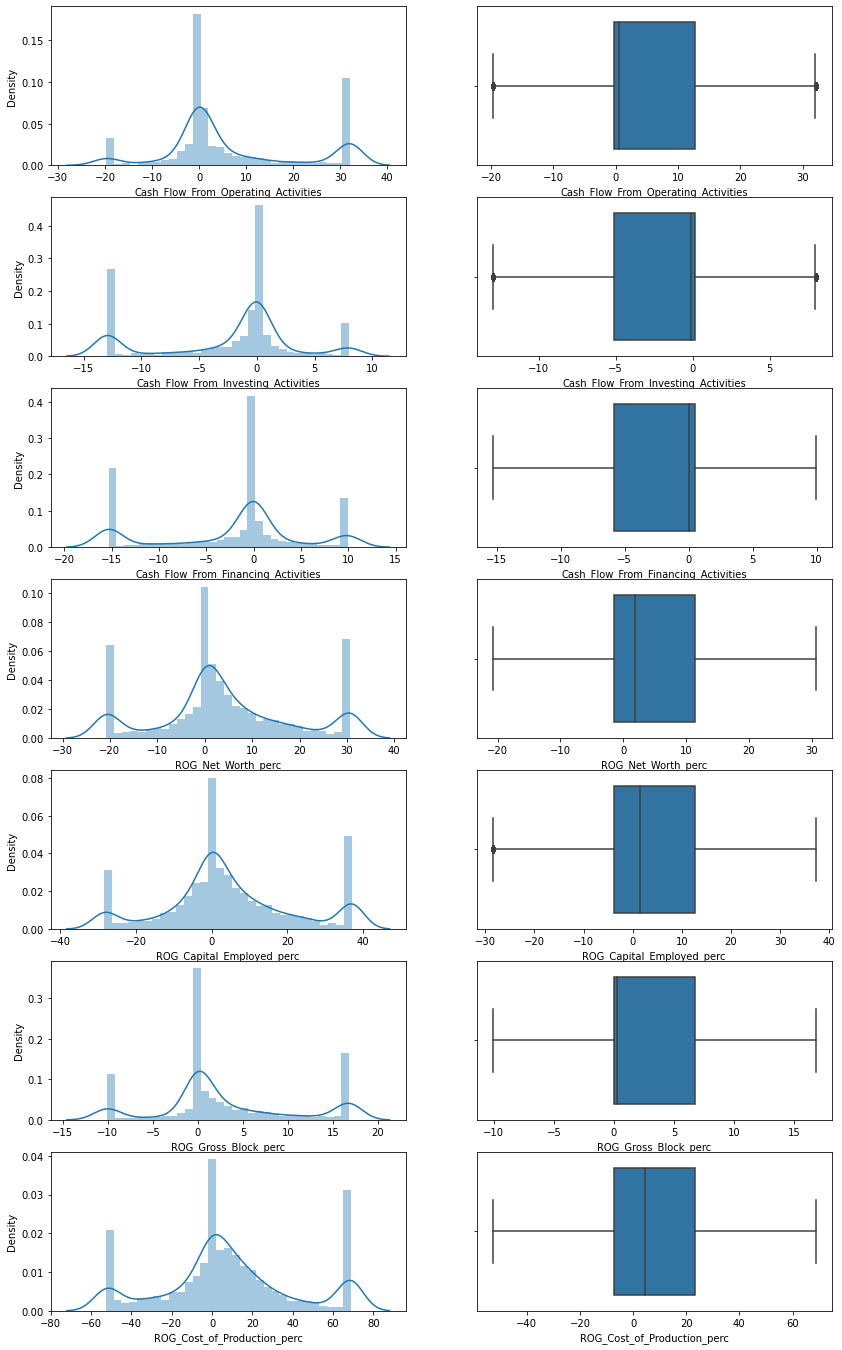

In [58]:
fig,axes = plt.subplots(nrows= 7, ncols=2)
fig.set_size_inches(14,24)

sns.distplot(df['Cash_Flow_From_Operating_Activities'], ax= axes[0][0])
sns.boxplot(df['Cash_Flow_From_Operating_Activities'],orient = 'H', ax= axes[0][1])

sns.distplot(df['Cash_Flow_From_Investing_Activities'], ax= axes[1][0])
sns.boxplot(df['Cash_Flow_From_Investing_Activities'],orient = 'H', ax= axes[1][1])

sns.distplot(df['Cash_Flow_From_Financing_Activities'], ax= axes[2][0])
sns.boxplot(df['Cash_Flow_From_Financing_Activities'],orient = 'H', ax= axes[2][1])

sns.distplot(df['ROG_Net_Worth_perc'], ax= axes[3][0])
sns.boxplot(df['ROG_Net_Worth_perc'],orient = 'H', ax= axes[3][1])

sns.distplot(df['ROG_Capital_Employed_perc'], ax= axes[4][0])
sns.boxplot(df['ROG_Capital_Employed_perc'],orient = 'H', ax= axes[4][1])

sns.distplot(df['ROG_Gross_Block_perc'], ax= axes[5][0])
sns.boxplot(df['ROG_Gross_Block_perc'],orient = 'H', ax= axes[5][1])

sns.distplot(df['ROG_Cost_of_Production_perc'], ax= axes[6][0])
sns.boxplot(df['ROG_Cost_of_Production_perc'],orient = 'H', ax= axes[6][1])

<AxesSubplot:xlabel='Interest_Cover_Ratio_Latest'>

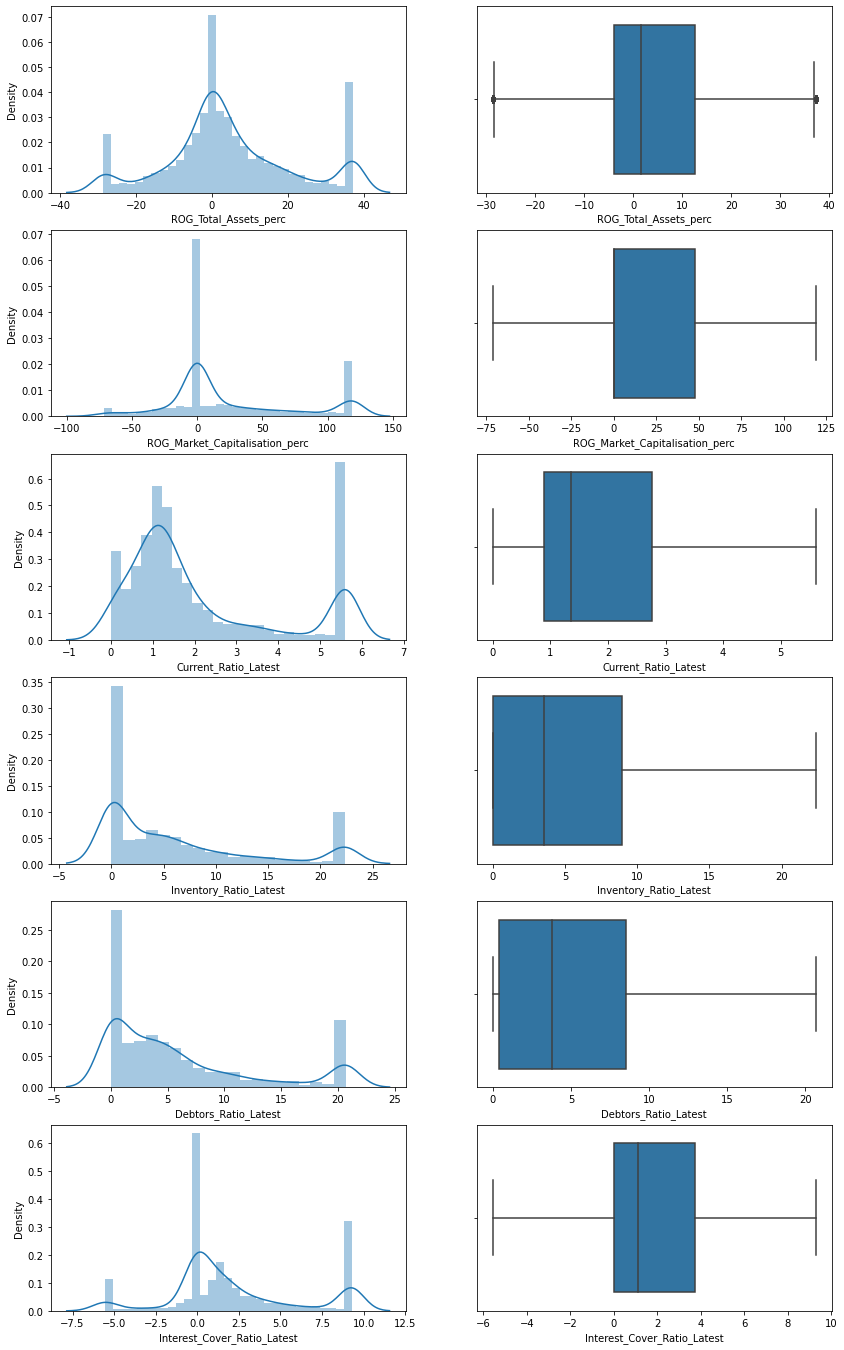

In [59]:
fig,axes = plt.subplots(nrows= 6, ncols=2)
fig.set_size_inches(14,24)

sns.distplot(df['ROG_Total_Assets_perc'], ax= axes[0][0])
sns.boxplot(df['ROG_Total_Assets_perc'],orient = 'H', ax= axes[0][1])

sns.distplot(df['ROG_Market_Capitalisation_perc'], ax= axes[1][0])
sns.boxplot(df['ROG_Market_Capitalisation_perc'],orient = 'H', ax= axes[1][1])

sns.distplot(df['Current_Ratio_Latest'], ax= axes[2][0])
sns.boxplot(df['Current_Ratio_Latest'],orient = 'H', ax= axes[2][1])

sns.distplot(df['Inventory_Ratio_Latest'], ax= axes[3][0])
sns.boxplot(df['Inventory_Ratio_Latest'],orient = 'H', ax= axes[3][1])

sns.distplot(df['Debtors_Ratio_Latest'], ax= axes[4][0])
sns.boxplot(df['Debtors_Ratio_Latest'],orient = 'H', ax= axes[4][1])

sns.distplot(df['Interest_Cover_Ratio_Latest'], ax= axes[5][0])
sns.boxplot(df['Interest_Cover_Ratio_Latest'],orient = 'H', ax= axes[5][1])

<AxesSubplot:xlabel='Inventory_Velocity_Days'>

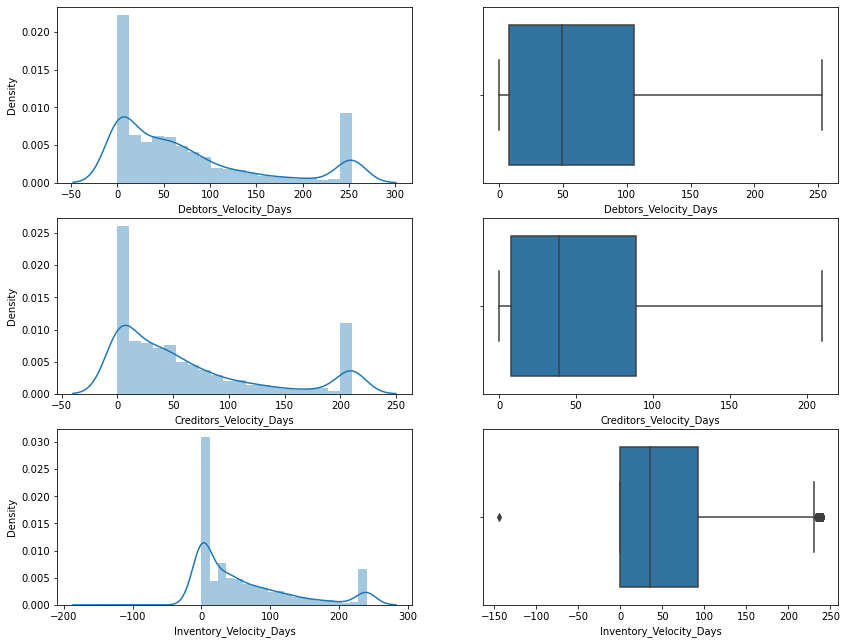

In [60]:
fig,axes = plt.subplots(nrows= 3, ncols=2)
fig.set_size_inches(14,11)

sns.distplot(df['Debtors_Velocity_Days'], ax= axes[0][0])
sns.boxplot(df['Debtors_Velocity_Days'],orient = 'H', ax= axes[0][1])

sns.distplot(df['Creditors_Velocity_Days'], ax= axes[1][0])
sns.boxplot(df['Creditors_Velocity_Days'],orient = 'H', ax= axes[1][1])

sns.distplot(df['Inventory_Velocity_Days'], ax= axes[2][0])
sns.boxplot(df['Inventory_Velocity_Days'],orient = 'H', ax= axes[2][1])

<AxesSubplot:xlabel='Default', ylabel='count'>

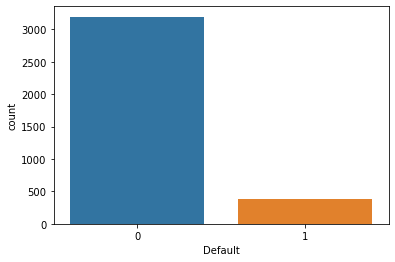

In [61]:
sns.countplot(x='Default',data=df)

In [62]:
df['Default'].value_counts(normalize=True)

0    0.892209
1    0.107791
Name: Default, dtype: float64

#### Bivariate analysis of few important features

#### Correlation

In [63]:
df_new.corr().head()

,Equity_Paid_Up,Other_Income,Selling_Cost,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Market_Capitalisation,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,...,ROG_Total_Assets_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Interest_Cover_Ratio_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Default
Equity_Paid_Up,1.000000,0.548094,0.449307,0.298003,0.383405,0.565059,0.310838,-0.267861,-0.201400,-0.012396,...,0.003182,0.128628,-0.178416,0.079985,0.075813,0.056582,0.042058,0.106625,0.047471,0.026919
Other_Income,0.548094,1.000000,0.599090,0.481717,0.557956,0.634285,0.434124,-0.309639,-0.337576,0.108033,...,0.046075,0.227477,-0.235575,0.163489,0.180418,0.219839,-0.019953,0.047178,0.105560,-0.047002
Selling_Cost,0.449307,0.599090,1.000000,0.621194,0.664970,0.589190,0.518352,-0.453266,-0.336535,0.155566,...,0.099270,0.305960,-0.259289,0.176378,0.231295,0.264874,-0.090072,-0.032154,0.132597,-0.099487
Revenue_earnings_in_forex,0.298003,0.481717,0.621194,1.000000,0.694207,0.476341,0.427256,-0.346580,-0.297252,0.110512,...,0.051713,0.317394,-0.209790,0.168821,0.145787,0.265012,-0.004031,-0.027967,0.138285,-0.097018
Revenue_expenses_in_forex,0.383405,0.557956,0.664970,0.694207,1.000000,0.556428,0.469339,-0.373900,-0.311591,0.115087,...,0.060143,0.319696,-0.232094,0.175711,0.163564,0.265261,-0.022434,-0.006079,0.149283,-0.084287


<AxesSubplot:>

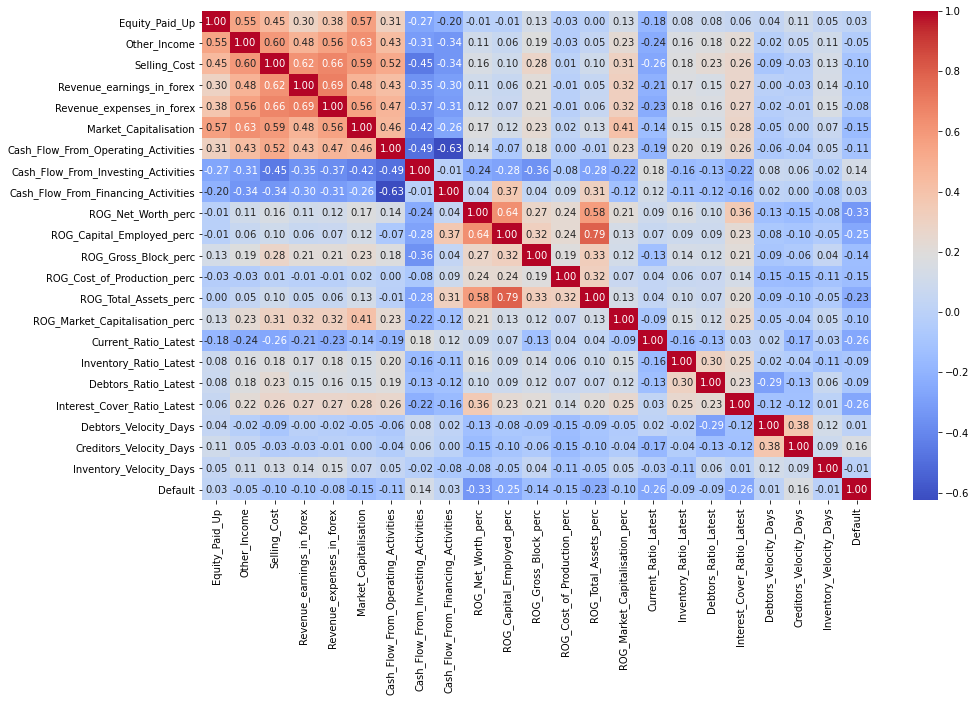

In [64]:
plt.figure(figsize=(15,9))
sns.heatmap(df_new.corr(), annot=True, fmt = '.2f', cmap='coolwarm')

###  1.5 Split the data into Train and Test dataset in a ratio of 67:33

In [65]:
X = df_new.drop(['Default'], axis=1)
y = df_new['Default']

In [66]:
X.head()

,Equity_Paid_Up,Other_Income,Selling_Cost,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Market_Capitalisation,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,...,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Interest_Cover_Ratio_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days
0,43.16875,7.6000,0.00000,0.00,0.00000,0.00000,-19.74,1.46000,9.915,-15.3100,...,1.38,-25.75,0.00,0.02,0.00,0.00,-0.20,0,0,45.0
1,43.16875,9.0575,9.70625,6.35,17.46875,278.64375,32.08,-12.97375,9.915,-20.7625,...,13.16,6.66,6.61,0.08,22.35,10.35,-0.84,29,101,2.0
2,43.16875,9.0575,9.70625,0.00,17.46875,278.64375,-19.74,-12.97375,9.915,-20.7625,...,-52.79,-0.78,-6.31,1.06,0.01,0.42,-2.21,97,210,0.0
3,43.16875,9.0575,3.34000,0.89,17.46875,194.27000,32.08,7.97625,-15.305,-20.7625,...,16.59,-10.12,-13.94,0.09,22.35,9.26,-0.16,93,63,2.0
4,43.16875,9.0575,1.97000,0.00,15.62000,113.68000,-19.74,7.97625,9.915,-20.7625,...,-48.80,-5.81,-12.91,0.50,0.02,1.28,-0.73,253,210,0.0


In [67]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [68]:
# Split X and y into training and test set in 67:33 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33 , random_state=42,stratify=y)

In [69]:
X_train.head()

,Equity_Paid_Up,Other_Income,Selling_Cost,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Market_Capitalisation,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,...,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Interest_Cover_Ratio_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days
2218,3.06000,0.2500,7.65000,18.0,17.46875,28.44000,12.28,-9.88000,-3.090,6.8800,...,9.06,4.98,91.64,1.26,5.79,2.81,1.130,119,37,108.0
498,5.10000,1.0800,0.01000,0.0,0.10000,3.55000,0.11,-1.09000,1.010,-20.7625,...,-52.79,-9.89,-0.28,1.17,7.79,3.49,2.240,253,210,0.0
1154,5.26000,0.0400,0.00000,0.0,4.95000,7.86000,1.95,-0.38000,-0.550,1.7600,...,-25.61,25.20,-21.56,1.48,12.14,7.43,1.290,53,19,8.0
1348,6.25000,0.0200,2.14000,0.0,0.00000,4.54000,-0.20,-2.16000,3.690,11.0400,...,-2.31,12.47,-35.97,1.34,22.35,0.70,4.600,253,210,47.0
3540,43.16875,9.0575,9.70625,18.0,17.46875,278.64375,32.08,-12.97375,-15.305,11.2800,...,9.10,5.41,-2.93,1.03,22.35,20.67,9.275,12,40,16.0


In [70]:
print(X_train.shape)
print(X_test.shape)

(2399, 22)
(1182, 22)


### 1.6 Build Logistic Regression Model (using statsmodel library) on most important variables on Train Dataset and choose the optimum cutoff. Also showcase your model building approach.

Creating logistic regression equation & storing it in f_1

model = SM.logit(formula=’Dependent Variable ~ Σ𝐼𝑛𝑑𝑒𝑝𝑒𝑛𝑑𝑒𝑛𝑡 𝑉𝑎𝑟𝑖𝑎𝑏𝑙𝑒𝑠 (𝑘)’ data = ‘Data Frame containing the required values’).fit()

In [71]:
!pip install imblearn

In [72]:
import statsmodels.formula.api as SM

#### Treating target imbalance using SMOTE

In [73]:
from imblearn.over_sampling import SMOTE 

In [74]:
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X, y)
df_new_smote = pd.concat([X_res, y_res], axis = 1)

In [75]:
df_new.groupby('Default').mean()

,Equity_Paid_Up,Other_Income,Selling_Cost,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Market_Capitalisation,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,...,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Interest_Cover_Ratio_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days
Default,,,,,,,,,,,,,,,,,,,,,
0,13.850668,2.492664,2.606390,4.748034,4.582045,78.146822,6.966613,-2.733743,-2.319355,5.772515,...,9.612523,5.604984,25.126498,2.247557,6.300451,6.188923,2.435894,74.982160,58.492958,61.358059
1,15.065178,1.970965,1.412999,2.438316,2.672309,25.134323,1.864016,-0.095965,-1.571891,-9.418964,...,-6.024534,-6.543229,9.128420,0.732863,4.178368,4.364197,-0.852681,77.963731,94.471503,59.906736


In [76]:
df_new_smote.groupby('Default').mean()

,Equity_Paid_Up,Other_Income,Selling_Cost,Revenue_earnings_in_forex,Revenue_expenses_in_forex,Market_Capitalisation,Cash_Flow_From_Operating_Activities,Cash_Flow_From_Investing_Activities,Cash_Flow_From_Financing_Activities,ROG_Net_Worth_perc,...,ROG_Cost_of_Production_perc,ROG_Total_Assets_perc,ROG_Market_Capitalisation_perc,Current_Ratio_Latest,Inventory_Ratio_Latest,Debtors_Ratio_Latest,Interest_Cover_Ratio_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days
Default,,,,,,,,,,,,,,,,,,,,,
0,13.850668,2.492664,2.606390,4.748034,4.582045,78.146822,6.966613,-2.733743,-2.319355,5.772515,...,9.612523,5.604984,25.126498,2.247557,6.300451,6.188923,2.435894,74.982160,58.492958,61.358059
1,14.557851,1.837586,1.376859,2.421716,2.688091,24.009239,1.694645,-0.100040,-1.513527,-9.288908,...,-7.589956,-6.330128,8.289601,0.743507,3.947187,4.116115,-0.877282,76.690317,95.113523,58.956035


#### Lets check all columns we have in the dataset

In [77]:
X_train.columns

Index(['Equity_Paid_Up', 'Other_Income', 'Selling_Cost',
       'Revenue_earnings_in_forex', 'Revenue_expenses_in_forex',
       'Market_Capitalisation', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Cost_of_Production_perc', 'ROG_Total_Assets_perc',
       'ROG_Market_Capitalisation_perc', 'Current_Ratio_Latest',
       'Inventory_Ratio_Latest', 'Debtors_Ratio_Latest',
       'Interest_Cover_Ratio_Latest', 'Debtors_Velocity_Days',
       'Creditors_Velocity_Days', 'Inventory_Velocity_Days'],
      dtype='object')

In [78]:
train = pd.concat([X_train, y_train], axis = 1)
train_smote = pd.concat([X_res, y_res], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [79]:
f_1 = 'Default ~ Equity_Paid_Up + Other_Income + Selling_Cost + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Capital_Employed_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + ROG_Market_Capitalisation_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

#### Building model using balanced data

In [80]:
model_1 = SM.logit(formula = f_1 , data = train_smote).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.363257
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 5591
Model:                          Logit   Df Residuals:                     5568
Method:                           MLE   Df Model:                           22
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.4681
Time:                        02:55:13   Log-Likelihood:                -2031.0
converged:                       True   LL-Null:                       -3818.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.3049      0.100     13.102      0.000       1.110       1.500
Equity_Paid_Up                          0.0147      0.004      3.662      0.000       0.007       0.023
Other_Income                            0.0811      0.020      4.133      0.000       0.043       0.120
Selling_Cost                           -0.0091      0.022     -0.420      0.675      -0.051       0.033
Revenue_earnings_in_forex              -0.0237      0.010     -2.456      0.014      -0.043      -0.005
Revenue_expenses_in_forex               0.0378      0.010      3.606      0.000       0.017       0.058
Market_Capitalisation                  -0.0084      0.001    -10.764      0.000      -0.010      -0.007
Cash_Flow_From_Operating_Activities    -0.0106      0.006     -1.839      0.066      -0.022       0.001
Cash_Flow_From_Investing_Activities     0.0244      0.012      2.053      0.040       0.001       0.048
Cash_Flow_From_Financing_Activities     0.0216      0.011      2.043      0.041       0.001       0.042
ROG_Net_Worth_perc                     -0.0549      0.004    -13.972      0.000      -0.063      -0.047
ROG_Capital_Employed_perc               0.0004      0.004      0.113      0.910      -0.007       0.008
ROG_Gross_Block_perc                   -0.0373      0.007     -5.244      0.000      -0.051      -0.023
ROG_Cost_of_Production_perc            -0.0070      0.001     -5.443      0.000      -0.010      -0.004
ROG_Total_Assets_perc                  -0.0107      0.004     -2.859      0.004      -0.018      -0.003
ROG_Market_Capitalisation_perc          0.0004      0.001      0.438      0.661      -0.002       0.002
Current_Ratio_Latest                   -0.7475      0.034    -21.887      0.000      -0.814      -0.681
Inventory_Ratio_Latest                 -0.0178      0.007     -2.568      0.010      -0.031      -0.004
Debtors_Ratio_Latest                   -0.0359      0.008     -4.739      0.000      -0.051      -0.021
Interest_Cover_Ratio_Latest            -0.1972      0.015    -12.741      0.000      -0.228      -0.167
Debtors_Velocity_Days                  -0.0045      0.001     -8.659      0.000      -0.006      -0.004
Creditors_Velocity_Days                 0.0038      0.001      6.682      0.000       0.003       0.005
Inventory_Velocity_Days                -0.0030      0.001     -5.133      0.000      -0.004      -0.002
=======================================================================================================
"""

In [81]:
f2 = 'Default ~ Equity_Paid_Up + Other_Income + Revenue_earnings_in_forex + Revenue_expenses_in_forex + Market_Capitalisation + Cash_Flow_From_Investing_Activities + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Gross_Block_perc + ROG_Cost_of_Production_perc + ROG_Total_Assets_perc + Current_Ratio_Latest + Inventory_Ratio_Latest + Debtors_Ratio_Latest + Interest_Cover_Ratio_Latest + Debtors_Velocity_Days + Creditors_Velocity_Days + Inventory_Velocity_Days' 

In [82]:
model_2 = SM.logit(formula = f2 , data = train_smote).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.363592
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 5591
Model:                          Logit   Df Residuals:                     5572
Method:                           MLE   Df Model:                           18
Date:                Tue, 31 May 2022   Pseudo R-squ.:                  0.4676
Time:                        02:55:13   Log-Likelihood:                -2032.8
converged:                       True   LL-Null:                       -3818.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.3089      0.099     13.182      0.000       1.114       1.504
Equity_Paid_Up                          0.0145      0.004      3.651      0.000       0.007       0.022
Other_Income                            0.0817      0.019      4.276      0.000       0.044       0.119
Revenue_earnings_in_forex              -0.0248      0.009     -2.687      0.007      -0.043      -0.007
Revenue_expenses_in_forex               0.0362      0.010      3.605      0.000       0.017       0.056
Market_Capitalisation                  -0.0085      0.001    -11.252      0.000      -0.010      -0.007
Cash_Flow_From_Investing_Activities     0.0371      0.010      3.773      0.000       0.018       0.056
Cash_Flow_From_Financing_Activities     0.0364      0.007      5.363      0.000       0.023       0.050
ROG_Net_Worth_perc                     -0.0546      0.004    -15.301      0.000      -0.062      -0.048
ROG_Gross_Block_perc                   -0.0367      0.007     -5.223      0.000      -0.050      -0.023
ROG_Cost_of_Production_perc            -0.0070      0.001     -5.478      0.000      -0.010      -0.005
ROG_Total_Assets_perc                  -0.0108      0.003     -3.433      0.001      -0.017      -0.005
Current_Ratio_Latest                   -0.7467      0.034    -21.904      0.000      -0.813      -0.680
Inventory_Ratio_Latest                 -0.0182      0.007     -2.638      0.008      -0.032      -0.005
Debtors_Ratio_Latest                   -0.0363      0.008     -4.833      0.000      -0.051      -0.022
Interest_Cover_Ratio_Latest            -0.1963      0.015    -12.725      0.000      -0.227      -0.166
Debtors_Velocity_Days                  -0.0045      0.001     -8.632      0.000      -0.006      -0.003
Creditors_Velocity_Days                 0.0038      0.001      6.681      0.000       0.003       0.005
Inventory_Velocity_Days                -0.0029      0.001     -5.082      0.000      -0.004      -0.002
=======================================================================================================
"""

#### Validating on resampled train set

In [83]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [84]:
# Prediction on the training set
y_pred_train_smote = np.where(model_2.predict(train_smote)>0.5, 1, 0)

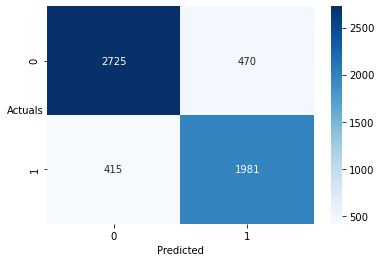

In [85]:
sns.heatmap((metrics.confusion_matrix(train_smote['Default'],y_pred_train_smote)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [86]:
print(classification_report(y_res, y_pred_train_smote))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      3195
           1       0.81      0.83      0.82      2396

    accuracy                           0.84      5591
   macro avg       0.84      0.84      0.84      5591
weighted avg       0.84      0.84      0.84      5591



### 1.7 Validate the Model on Test Dataset and state the performance matrices. Also state interpretation from the model

In [87]:
# Prediction on the testing set
y_pred_test_smote = np.where(model_2.predict(test) > 0.5, 1, 0)

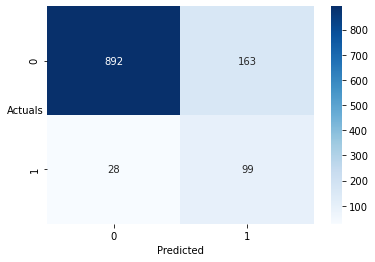

In [88]:
sns.heatmap((metrics.confusion_matrix(test['Default'],y_pred_test_smote)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [89]:
print(classification_report(y_test, y_pred_test_smote))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1055
           1       0.38      0.78      0.51       127

    accuracy                           0.84      1182
   macro avg       0.67      0.81      0.71      1182
weighted avg       0.91      0.84      0.86      1182



### 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

In [90]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [91]:
grid_search.fit(X_res, y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [92]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 50}

In [93]:
best_grid = grid_search.best_estimator_

#### Validating on train set

In [94]:
pred_train_rf = np.where(best_grid.predict(X_res)>0.5,1,0)

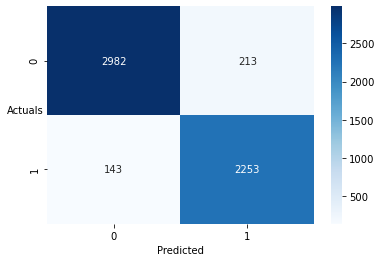

In [95]:
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_rf)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [96]:
print(metrics.classification_report(y_res, pred_train_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3195
           1       0.91      0.94      0.93      2396

    accuracy                           0.94      5591
   macro avg       0.93      0.94      0.94      5591
weighted avg       0.94      0.94      0.94      5591



### 1.9 Validate the Random Forest Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [97]:
pred_test_rf = np.where(best_grid.predict(X_test)>0.5,1,0)

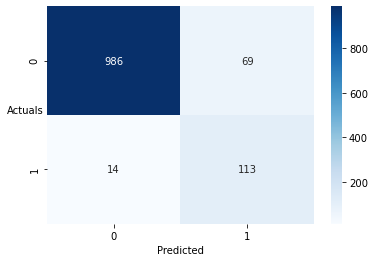

In [98]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [99]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1055
           1       0.62      0.89      0.73       127

    accuracy                           0.93      1182
   macro avg       0.80      0.91      0.85      1182
weighted avg       0.95      0.93      0.94      1182



### 1.10 Build a LDA Model on Train Dataset. Also showcase your model building approach

In [100]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [101]:
LDA = LinearDiscriminantAnalysis()

In [102]:
lda_model = LDA.fit(X_res, y_res)

#### Validating on train set

In [103]:
pred_train_lda = lda_model.predict(X_res)

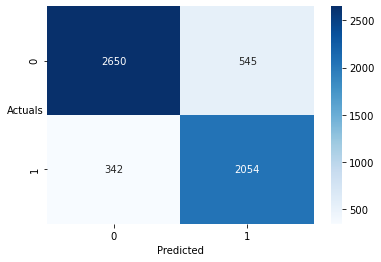

In [104]:
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_lda)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [105]:
print(metrics.classification_report(y_res, pred_train_lda))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3195
           1       0.79      0.86      0.82      2396

    accuracy                           0.84      5591
   macro avg       0.84      0.84      0.84      5591
weighted avg       0.84      0.84      0.84      5591



### 1.11 Validate the LDA Model on test Dataset and state the performance matrices. Also state interpretation from the model

In [106]:
pred_test_lda = lda_model.predict(X_test)

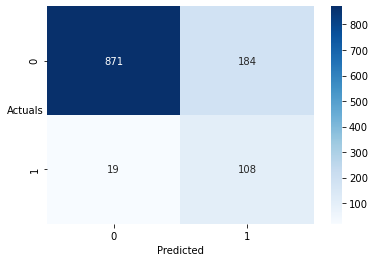

In [107]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [108]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      1055
           1       0.37      0.85      0.52       127

    accuracy                           0.83      1182
   macro avg       0.67      0.84      0.71      1182
weighted avg       0.91      0.83      0.85      1182



#### Choosing the optimal threshold

In [109]:
pred_train_lda_prob = lda_model.predict_proba(X_res)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [110]:
fpr, tpr, thresholds = roc_curve(y_res,pred_train_lda_prob)

In [111]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.5527147413056721

In [112]:
y_class_pred_train=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.55:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

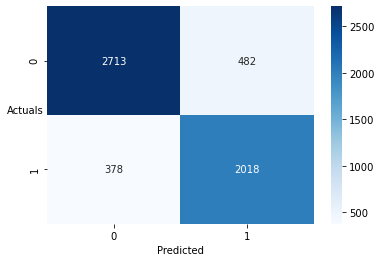

In [113]:
sns.heatmap((metrics.confusion_matrix(y_res,y_class_pred_train)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [114]:
print(metrics.classification_report(y_res, y_class_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      3195
           1       0.81      0.84      0.82      2396

    accuracy                           0.85      5591
   macro avg       0.84      0.85      0.84      5591
weighted avg       0.85      0.85      0.85      5591



In [115]:
y_class_pred_test=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.55:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

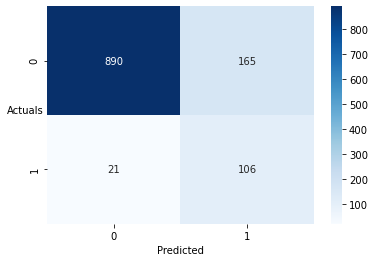

In [116]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [117]:
print(metrics.classification_report(y_test, y_class_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91      1055
           1       0.39      0.83      0.53       127

    accuracy                           0.84      1182
   macro avg       0.68      0.84      0.72      1182
weighted avg       0.91      0.84      0.87      1182



### 1.12 Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)

#### Logistic Regression - AUC and ROC Curve for training data

AUC: 0.840


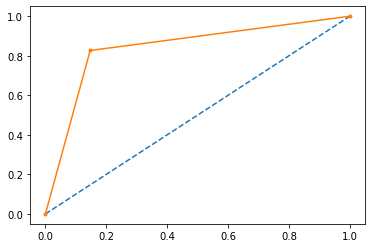

In [118]:
# accuracy score of the model
auc = roc_auc_score(y_res,y_pred_train_smote)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_res,y_pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Logistic Regression - AUC and ROC Curve for testing data

AUC: 0.813


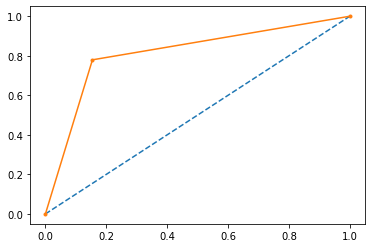

In [119]:
# accuracy score of the model
auc = roc_auc_score(y_test,y_pred_test_smote)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Random Forest - AUC and ROC Curve for training data

AUC: 0.937


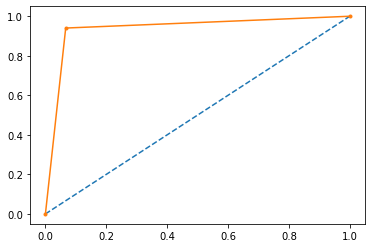

In [120]:
# accuracy score of the model
auc = roc_auc_score(y_res,pred_train_rf)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_res,pred_train_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Random Forest - AUC and ROC Curve for testing data

AUC: 0.912


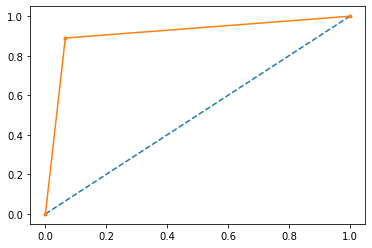

In [121]:
# accuracy score of the model
auc = roc_auc_score(y_test,pred_test_rf)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,pred_test_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Linear Discriminant Analysis - AUC and ROC Curve for training data

AUC: 0.843


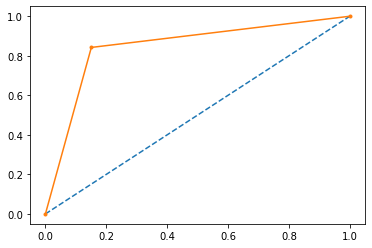

In [124]:
# accuracy score of the model
auc = roc_auc_score(y_res,pred_train_lda)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_res,y_class_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Linear Discriminant Analysis - AUC and ROC Curve for testing data

AUC: 0.838


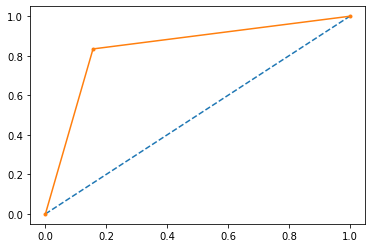

In [125]:
# accuracy score of the model
auc = roc_auc_score(y_test,pred_test_lda)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,y_class_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [126]:
data = [[0.84,0.84,0.93,0.93,0.85,0.84],[0.81,0.38,0.91,0.62,0.81,0.39],[0.83,0.78,0.94,0.91,0.84,0.83],[0.82,0.51,0.93,0.74,0.82,0.53],[0.840,0.813,0.937,0.912,0.843,0.838]]

In [128]:
cf = pd.DataFrame(data, columns = ['LR Train','LR Test','RF Train','RF Test','LDA Train','LDA Test'], index=['accuracy','precision','recall','f1score','auc_roc_score'])
cf.T

,accuracy,precision,recall,f1score,auc_roc_score
LR Train,0.84,0.81,0.83,0.82,0.840
LR Test,0.84,0.38,0.78,0.51,0.813
RF Train,0.93,0.91,0.94,0.93,0.937
RF Test,0.93,0.62,0.91,0.74,0.912
LDA Train,0.85,0.81,0.84,0.82,0.843
LDA Test,0.84,0.39,0.83,0.53,0.838


                                                      The End

### Market Risk
The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights.

You are expected to do the Market Risk Analysis using Python.

#### Importing the dataset

In [3]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')

#Glimpse of Data
stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### Fixing messy column names (containing spaces) for ease of use

In [4]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_').str.replace('&', 'and')
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


#### First, let us check the number of rows (observations) and the number of columns (variables)¶

In [5]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


#### Checking data types of all columns

In [6]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   314 non-null    object
 1   Infosys                314 non-null    int64 
 2   Indian_Hotel           314 non-null    int64 
 3   Mahindra_and_Mahindra  314 non-null    int64 
 4   Axis_Bank              314 non-null    int64 
 5   SAIL                   314 non-null    int64 
 6   Shree_Cement           314 non-null    int64 
 7   Sun_Pharma             314 non-null    int64 
 8   Jindal_Steel           314 non-null    int64 
 9   Idea_Vodafone          314 non-null    int64 
 10  Jet_Airways            314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


#### Now, let us check the basic measures of descriptive statistics for the continuous variables

In [7]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,511.340764,114.560510,636.678344,540.742038,59.095541,14806.410828,633.468153,147.627389,53.713376,372.659236
std,135.952051,22.509732,102.879975,115.835569,15.810493,4288.275085,171.855893,65.879195,31.248985,202.262668
min,234.000000,64.000000,284.000000,263.000000,21.000000,5543.000000,338.000000,53.000000,3.000000,14.000000
25%,424.000000,96.000000,572.000000,470.500000,47.000000,10952.250000,478.500000,88.250000,25.250000,243.250000
50%,466.500000,115.000000,625.000000,528.000000,57.000000,16018.500000,614.000000,142.500000,53.000000,376.000000
75%,630.750000,134.000000,678.000000,605.250000,71.750000,17773.250000,785.000000,182.750000,82.000000,534.000000
max,810.000000,157.000000,956.000000,808.000000,104.000000,24806.000000,1089.000000,338.000000,117.000000,871.000000


### 2.1 Draw Stock Price Graph(Stock Price vs Time) for any 2 given stocks with inference

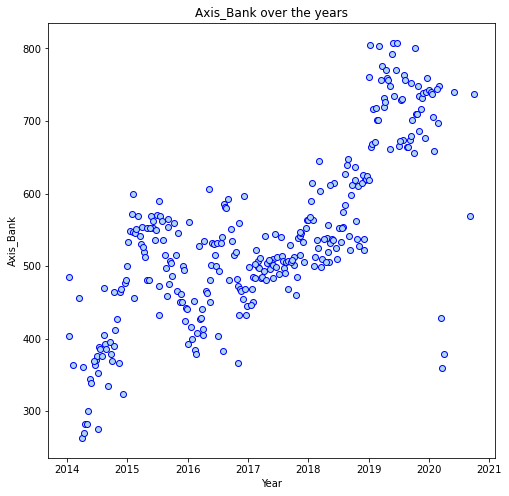

In [8]:
plt.figure(figsize = (8, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Axis_Bank'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Axis_Bank over the years')
plt.show()

From this graph, we can observe an increase in the trend of stocks.

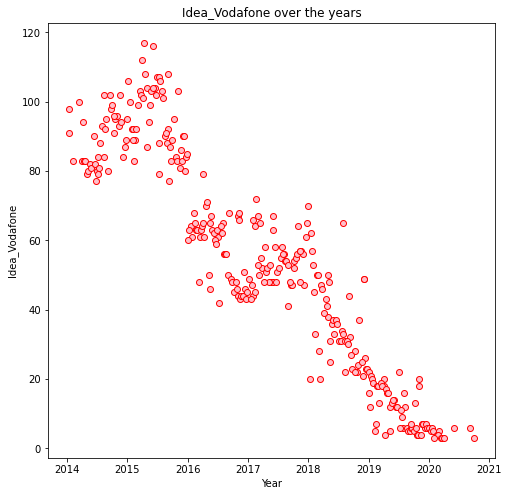

In [9]:
plt.figure(figsize = (8, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Idea_Vodafone'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Idea_Vodafone')
plt.title('Idea_Vodafone over the years')
plt.show()

From this graph, we can observe a decrease in the trend of stocks.

### 2.2 Calculate Returns for all stocks with inference
Steps for calculating returns from prices:

Take logarithms,
Take differences

In [10]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

#### Checking the rows & columns of dataset

In [11]:
stock_returns.shape

(314, 10)

#### Checking the returns

In [12]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


### 2.3 Calculate Stock Means and Standard Deviation for all stocks with inference

#### Calculating stock means

In [13]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                  0.002794
Indian_Hotel             0.000266
Mahindra_and_Mahindra   -0.001506
Axis_Bank                0.001167
SAIL                    -0.003463
Shree_Cement             0.003681
Sun_Pharma              -0.001455
Jindal_Steel            -0.004123
Idea_Vodafone           -0.010608
Jet_Airways             -0.009548
dtype: float64

#### Calculating stock standard deviation

In [14]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                  0.035070
Indian_Hotel             0.047131
Mahindra_and_Mahindra    0.040169
Axis_Bank                0.045828
SAIL                     0.062188
Shree_Cement             0.039917
Sun_Pharma               0.045033
Jindal_Steel             0.075108
Idea_Vodafone            0.104315
Jet_Airways              0.097972
dtype: float64

In [15]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df.T

,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
Average,0.002794,0.000266,-0.001506,0.001167,-0.003463,0.003681,-0.001455,-0.004123,-0.010608,-0.009548
Volatility,0.035070,0.047131,0.040169,0.045828,0.062188,0.039917,0.045033,0.075108,0.104315,0.097972


### 2.4 Draw a plot of Stock Means vs Standard Deviation and state your inference

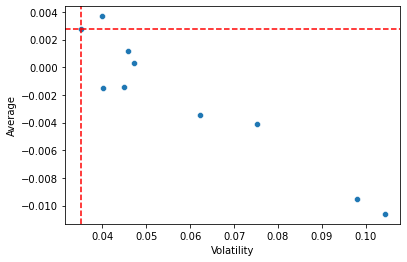

In [20]:
#plt.scatter(stock_sd, stock_means, edgecolors='r')
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.035070,linestyle='--', color = "red")
plot.axhline(y=0.002794,linestyle='--', color = "red")
plt.show()

From the above graph, we can infer that stock means and standard deviation are inversely proportional. i.e. Standard Deviation decreases with increase in stock mean.

In [21]:
df[df['Average'] > 0].sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.002794,0.035070
Shree_Cement,0.003681,0.039917
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131


                                                     End